In [ ]:
from google.colab import files
files.upload()

In [28]:
import os
#https://www.kaggle.com/datasets/stefancomanita/cats-and-dogs-40 --dataseturl
# Create .kaggle directory if it doesn't exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json to the correct directory
!mv kaggle.json /root/.kaggle/

# Set permissions to make the API key readable
!chmod 600 /root/.kaggle/kaggle.json


In [30]:
# Install the Kaggle API
!pip install kaggle
!kaggle datasets download -d stefancomanita/cats-and-dogs-40


Dataset URL: https://www.kaggle.com/datasets/stefancomanita/cats-and-dogs-40
License(s): CC0-1.0
100% 445k/445k [00:00<00:00, 846kB/s]
100% 445k/445k [00:00<00:00, 845kB/s]


In [31]:
!unzip /content/cats-and-dogs-40.zip -d /content/


Archive:  /content/cats-and-dogs-40.zip
  inflating: /content/catsAndDogs40/test/cat/1.jpg  
  inflating: /content/catsAndDogs40/test/cat/2.jpg  
  inflating: /content/catsAndDogs40/test/cat/3.jpg  
  inflating: /content/catsAndDogs40/test/cat/4.jpg  
  inflating: /content/catsAndDogs40/test/cat/5.jpg  
  inflating: /content/catsAndDogs40/test/cat/6.jpg  
  inflating: /content/catsAndDogs40/test/cat/7.jpg  
  inflating: /content/catsAndDogs40/test/cat/8.jpg  
  inflating: /content/catsAndDogs40/test/dog/1.jpg  
  inflating: /content/catsAndDogs40/test/dog/2.jpg  
  inflating: /content/catsAndDogs40/test/dog/3.jpg  
  inflating: /content/catsAndDogs40/test/dog/4.jpg  
  inflating: /content/catsAndDogs40/test/dog/5.jpg  
  inflating: /content/catsAndDogs40/test/dog/6.jpg  
  inflating: /content/catsAndDogs40/test/dog/7.jpg  
  inflating: /content/catsAndDogs40/test/dog/8.jpg  
  inflating: /content/catsAndDogs40/train/cat/1.jpg  
  inflating: /content/catsAndDogs40/train/cat/10.jpg  
  i

In [34]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np

Categories = ['cat', 'dog']
flat_data_arr = []
target_arr = []
main_datadir = 'catsAndDogs40/'


for category in Categories:
    print(f'loading... category: {category}')


    train_or_test_dirs = ['train', 'test']

    for train_or_test in train_or_test_dirs:

        path = os.path.join(main_datadir, train_or_test, category)

        for img in os.listdir(path):
            img_array = imread(os.path.join(path, img))
            img_resized = resize(img_array, (40, 40, 3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(category))

        print(f'loaded {train_or_test} category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

loading... category: cat
loaded train category: cat successfully
loaded test category: cat successfully
loading... category: dog
loaded train category: dog successfully
loaded test category: dog successfully


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape


(80, 4801)

In [41]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20,stratify=y)

# Creating a support vector classifier
svc=svm.SVC(probability=True)

# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
# Testing the model using the testing data
y_pred = model.predict(x_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)

# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

print(classification_report(y_test, y_pred, target_names=['cat', 'dog']))

The model is 68.75% accurate
              precision    recall  f1-score   support

         cat       0.64      0.88      0.74         8
         dog       0.80      0.50      0.62         8

    accuracy                           0.69        16
   macro avg       0.72      0.69      0.68        16
weighted avg       0.72      0.69      0.68        16



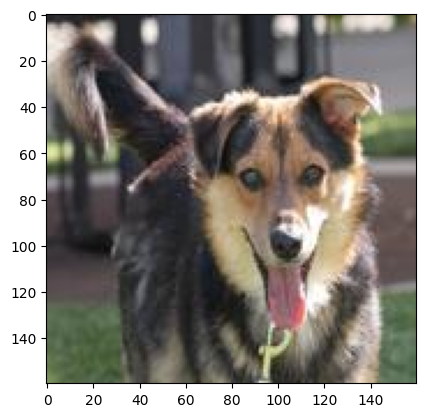

The predicted image is : dog


In [40]:
path='catsAndDogs40/test/dog/2.jpg'
img=imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img,(40,40,3))
l=[img_resize.flatten()]
print("The predicted image is : "+Categories[model.predict(l)[0]])